<a href="https://colab.research.google.com/github/ashwinidverma/AD-Classifier-/blob/main/OASIS_AD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
##import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import lime
#from lime import lime_tabular
#shap.initjs()

In [14]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/Socital_403_2024/ML_Model/Final_Data/Oasis_Data.xlsx')

# Print the DataFrame
print(df.shape)


(586, 11)


In [15]:
df=df.dropna()
df

,ID,Sex,Hand,Age,Educ,SES,MMSE,Target,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344.00,0.743000,1.30600
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147.00,0.810000,1.53100
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,1.0,1454.00,0.708000,1.20700
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636.00,0.689000,1.07300
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321.00,0.827000,1.32900
...,...,...,...,...,...,...,...,...,...,...,...
579,OAS2_0179,M,R,79,20.0,1.0,26.0,1.0,1548.02,0.710546,1.13371
582,OAS2_0183,F,R,66,13.0,2.0,30.0,0.0,1495.24,0.746302,1.17373
583,OAS2_0184,F,R,72,16.0,3.0,24.0,1.0,1353.81,0.733098,1.29634
584,OAS2_0185,M,R,80,16.0,1.0,28.0,1.0,1703.59,0.710542,1.03018


In [16]:
# prompt: train a randomforest classifier usinf M/F,Hand,Age,Educ,SES,MMSE of df as feature and CDR as traget

from sklearn.ensemble import RandomForestClassifier
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
#df['Target'] = df['Target'].replace({0: 0, 1: 1, 2 :1})

<ipython-input-16-c2025840cefc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})


In [19]:
df= df[['Sex',  'Age', 'Educ', 'MMSE','eTIV','nWBV','ASF','Target',]]

In [20]:
df=df.dropna()
print(df.shape)

(358, 8)


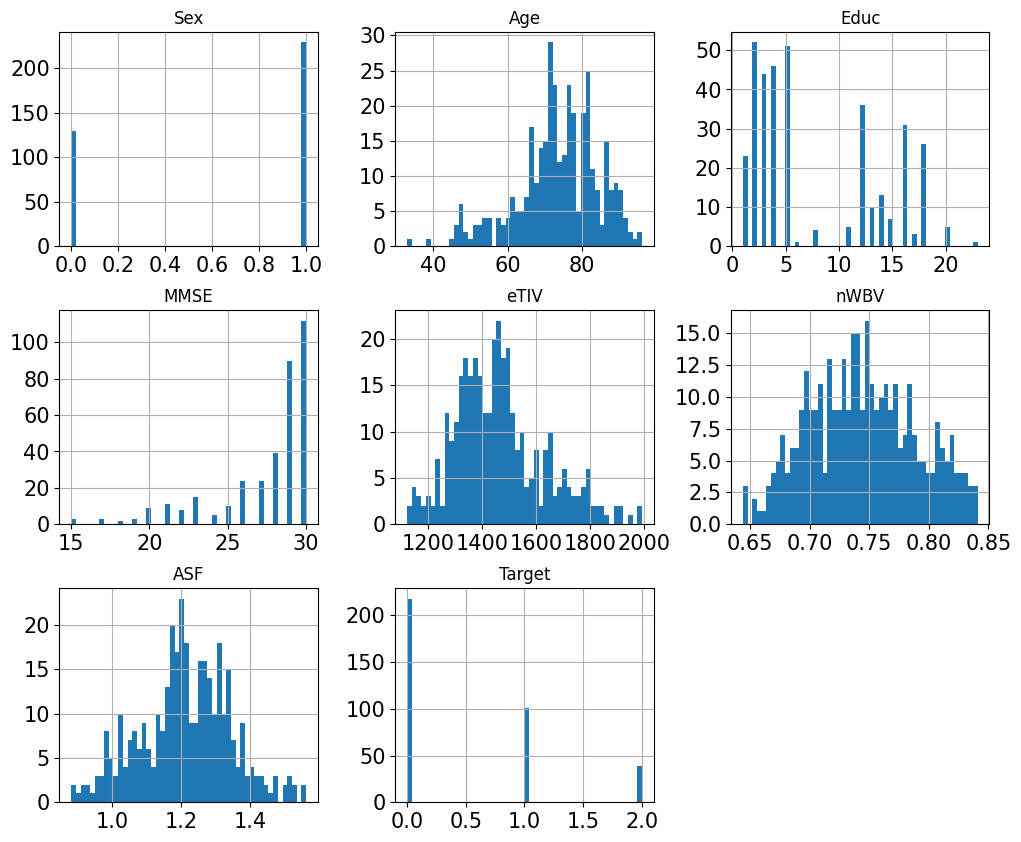

In [21]:
df[['Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF','Target',]].hist(figsize=(12, 10), bins=50, xlabelsize=15, ylabelsize=15)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # 1. Load and Preprocess Data
# # Using Iris dataset as an example

features = ['Sex',  'Age', 'Educ','eTIV','nWBV','ASF']
target = 'Target'

X = df[features]
y = df[target]
# # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
cor = df[['Target','Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF']]

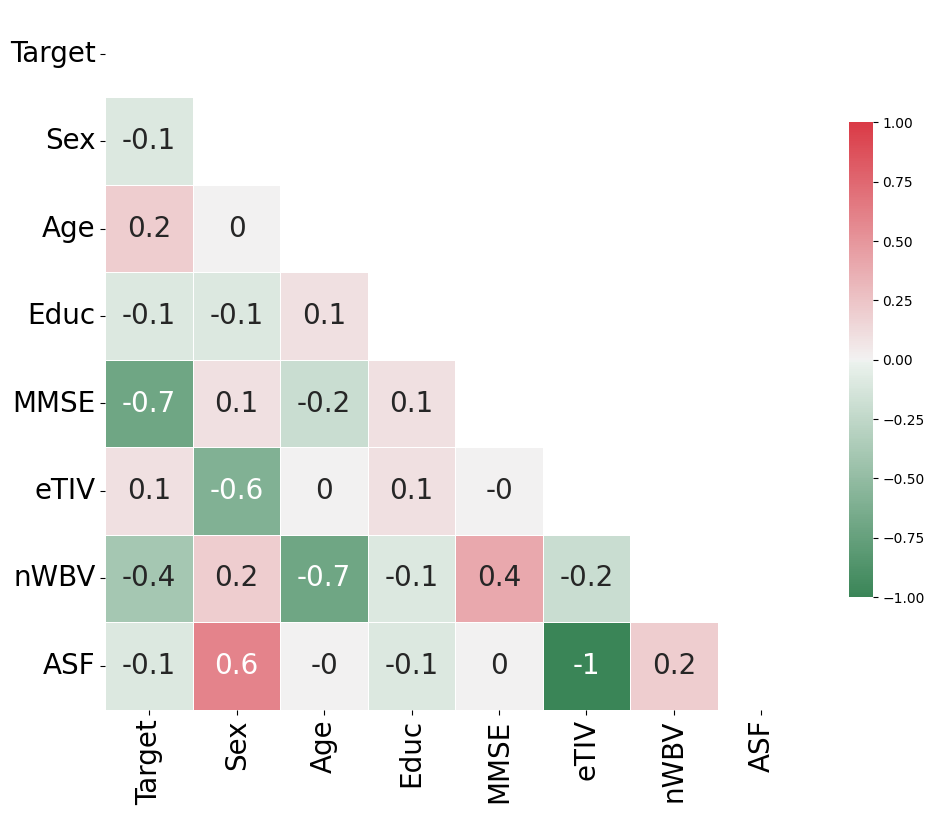

In [ ]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70        37
         1.0       0.69      0.57      0.62        35

    accuracy                           0.67        72
   macro avg       0.67      0.66      0.66        72
weighted avg       0.67      0.67      0.66        72

Confusion Matrix:
[[28  9]
 [15 20]]
Accuracy: 0.6666666666666666
Feature Importances: [0.03325386 0.22022465 0.11331927 0.13762902 0.35448714 0.14108607]


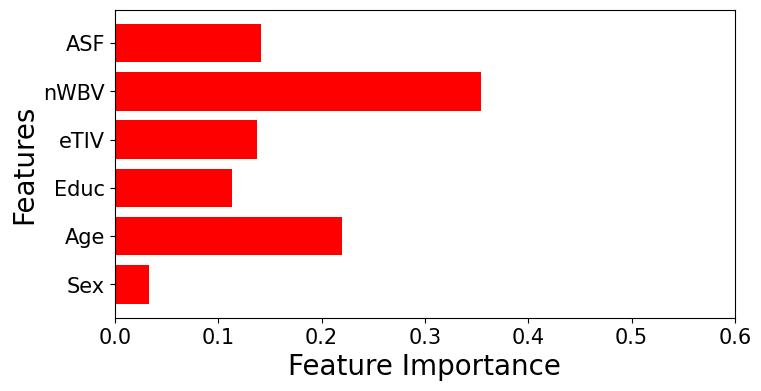

In [ ]:

# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth =8,min_samples_split =10,random_state=42,)



# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt
plt.style.use("default")

plt.figure(figsize=(8, 4))
plt.barh(X_train.columns, feature_importances,color = 'red')
plt.xlabel('Feature Importance',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,0.6)
#plt.title('Feature Importances in Random Forest Classifier')
plt.show()

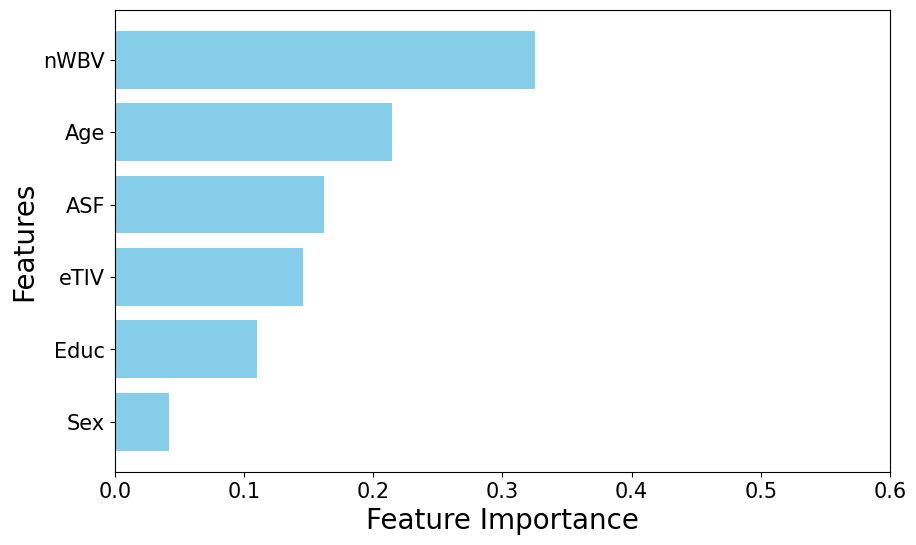

In [ ]:
# Get feature importances and sort them
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Create a DataFrame for better visualization
sorted_features = pd.DataFrame({
    'Feature': np.array(X_train.columns)[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'], sorted_features['Importance'], color="skyblue")
plt.xlabel('Feature Importance',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,0.6)
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

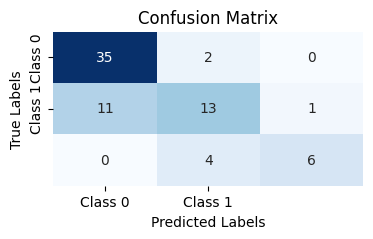

In [ ]:
plt.figure(figsize=(4, 2), facecolor='white')  # Ensure figure background is white
ax = plt.gca()
ax.set_facecolor('white')  # Set the axis background to white as well

# Plot heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier


warnings.simplefilter('ignore')
import os
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [ ]:
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )

  print('Train confusion matrix:')
 # print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds)
  test_auc = roc_auc_score(y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)

  # Fscore, precision and recall on test data
  f1 = f1_score(y_train_test, test_class_preds)
  precision = precision_score(y_test, test_class_preds)
  recall = recall_score(y_test, test_class_preds)


  #R2 score on train and test data
  train_log = log_loss(y_train,train_preds)
  test_log = log_loss(y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
#  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_

  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)

  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))

  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values


  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [ ]:
# Number of trees
n_estimators = range(4,50,4)


# Maximum depth of trees
max_depth = range(2,14,2)

# Minimum number of samples required to split a node
min_samples_split = range(4,50,4)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(4,50,4)


# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#print(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, y_train)


Streaming output truncated to the last 5000 lines.
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=32, n_estimators=48; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=8; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=8; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=28, min_samples_split=36, n_estimators=16; total time=   0.0s
[CV] END max_depth=10, min_samples_

In [ ]:
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.7587412587412588
The accuracy on test dataset is 0.6388888888888888

Train confusion matrix:

Test confusion matrix:
[[35  2  0]
 [14 11  0]
 [ 0 10  0]]



ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:


df=df.dropna()
print(df)


features = ['M/F',  'Age', 'Educ', 'MMSE','eTIV','nWBV','ASF']
target = 'CDR'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                 ID  M/F Hand  Age  Educ  SES  MMSE  CDR     eTIV      nWBV  \
0    OAS1_0001_MR1     1    R   74   2.0  3.0  29.0  0.0  1344.00  0.743000   
1     OAS1_0002_MR1    1    R   55   4.0  1.0  29.0  0.0  1147.00  0.810000   
2     OAS1_0003_MR1    1    R   73   4.0  3.0  27.0  1.0  1454.00  0.708000   
8     OAS1_0010_MR1    0    R   74   5.0  2.0  30.0  0.0  1636.00  0.689000   
9     OAS1_0011_MR1    1    R   52   3.0  2.0  30.0  0.0  1321.00  0.827000   
..              ...  ...  ...  ...   ...  ...   ...  ...      ...       ...   
579       OAS2_0179    0    R   79  20.0  1.0  26.0  1.0  1548.02  0.710546   
582       OAS2_0183    1    R   66  13.0  2.0  30.0  0.0  1495.24  0.746302   
583       OAS2_0184    1    R   72  16.0  3.0  24.0  1.0  1353.81  0.733098   
584       OAS2_0185    0    R   80  16.0  1.0  28.0  1.0  1703.59  0.710542   
585       OAS2_0186    1    R   61  13.0  2.0  30.0  0.0  1319.02  0.801006   

         ASF  
0    1.30600  
1    1.53100  
2    1

NameError: name 'train_test_split' is not defined

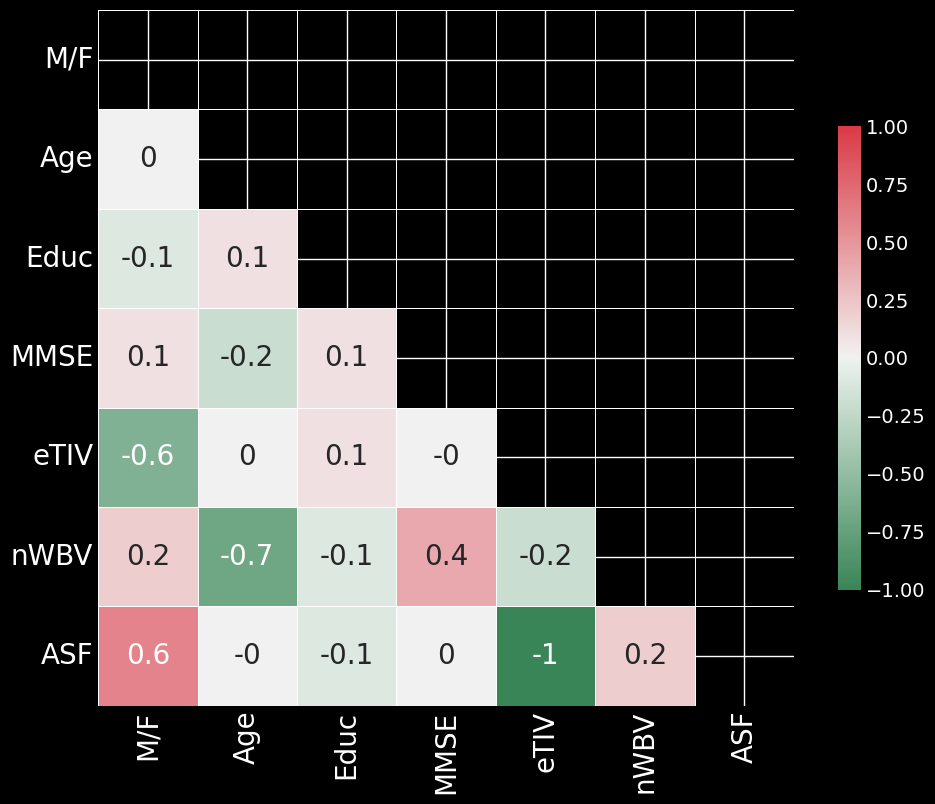

In [ ]:
cor = df[features]
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        37
         1.0       0.78      0.72      0.75        25
         2.0       0.88      0.70      0.78        10

    accuracy                           0.83        72
   macro avg       0.84      0.79      0.81        72
weighted avg       0.83      0.83      0.83        72

Confusion Matrix:
[[35  2  0]
 [ 6 18  1]
 [ 0  3  7]]
Accuracy: 0.8333333333333334
Feature Importances: [0.03090512 0.13907819 0.07897554 0.30223984 0.13414893 0.18814339
 0.12650899]


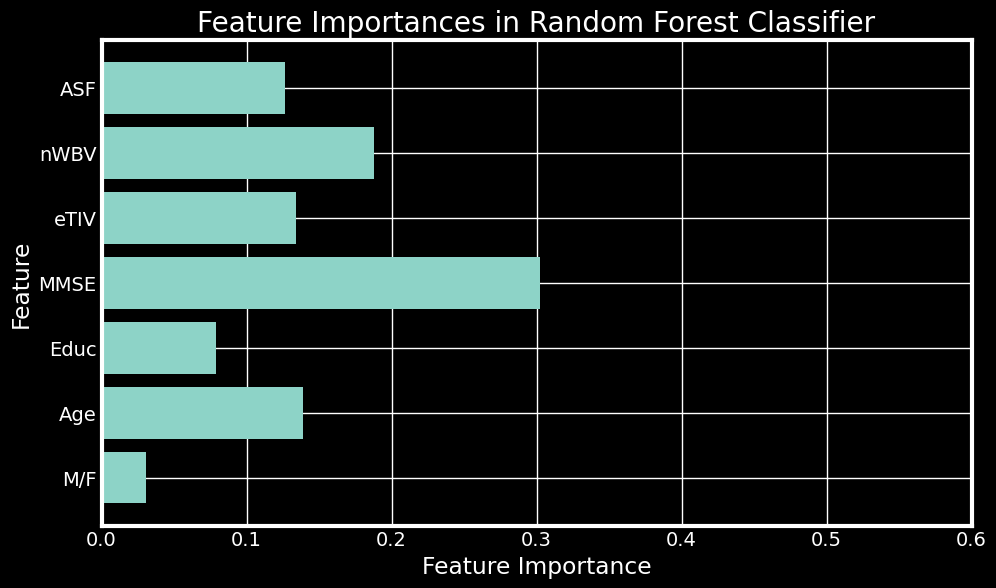

In [ ]:
# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.xlim(0,0.6)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

                ID  M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0    OAS1_0001_MR1    1    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306
1    OAS1_0002_MR1    1    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531
2    OAS1_0003_MR1    1    R   73   4.0  3.0  27.0  1.0  1454  0.708  1.207
3    OAS1_0004_MR1    0    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105
4    OAS1_0005_MR1    0    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010
..             ...  ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
804  OAS2_0185_MR2    0    R   82  16.0  1.0  28.0  1.0  1693  0.694  1.037
805  OAS2_0185_MR3    0    R   86  16.0  1.0  26.0  1.0  1688  0.675  1.040
806  OAS2_0186_MR1    1    R   61  13.0  2.0  30.0  0.0  1319  0.801  1.331
807  OAS2_0186_MR2    1    R   63  13.0  2.0  30.0  0.0  1327  0.796  1.323
808  OAS2_0186_MR3    1    R   65  13.0  2.0  30.0  0.0  1333  0.801  1.317

[809 rows x 11 columns]


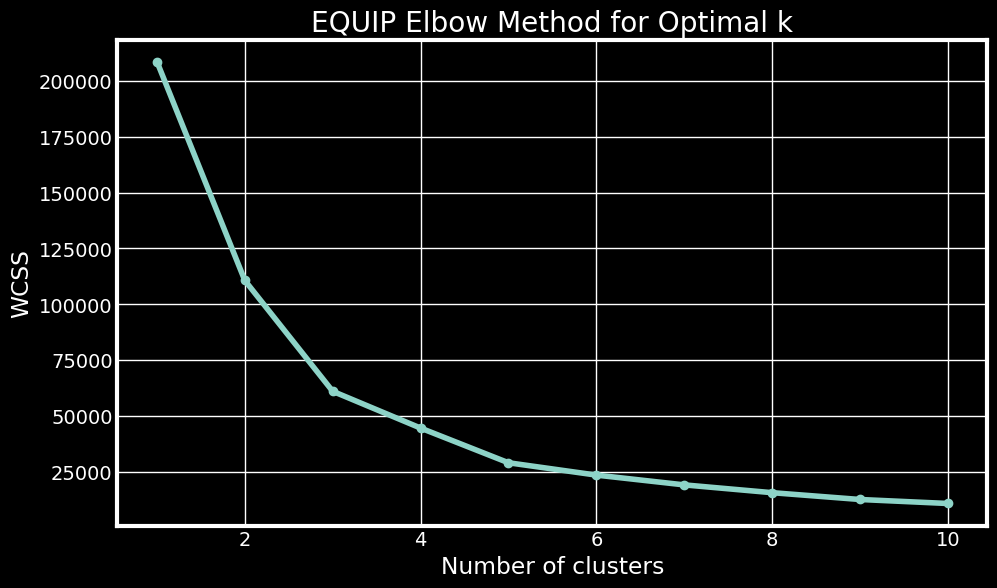

In [ ]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/Socital_403_2024/ML_Model/Data.xlsx')
#from sklearn.ensemble import RandomForestClassifier
df['M/F'] = df['M/F'].replace({'M': 0, 'F': 1})
df['CDR'] = df['CDR'].replace({0: 0, 0.5: 1, 1 : 2,2:2})
# Print the DataFrame
print(df)
EQUIP=df.dropna()
#EQUIP=data1
col = [ 'MMSE','nWBV']
input1 = EQUIP[col]

input1.columns
# X_train,X_test,y_train,y_test = train_test_split(input, target, test_size=0.3,random_state = 0)
# print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
X1 =input1

scaler1 = StandardScaler()
data_scaled1 = scaler1.fit_transform(X1)




# Perform t-SNE
tsne1 = TSNE(n_components=2, random_state=0)
data_tsne1 = tsne1.fit_transform(data_scaled1)

# Create a DataFrame with t-SNE results
tsne_df1 = pd.DataFrame(data_tsne1, columns=['Dim1', 'Dim2'])

from sklearn.cluster import KMeans

# Define the range of k values to test
k_range1 = range(1, 11)
wcss1 = []

# Compute k-Means for each k and calculate WCSS
for k in k_range1:
    kmeans1 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans1.fit(data_tsne1)
    wcss1.append(kmeans1.inertia_)  # WCSS is stored in kmeans.inertia_

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range1, wcss1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('EQUIP Elbow Method for Optimal k')
plt.grid(True)
plt.show()

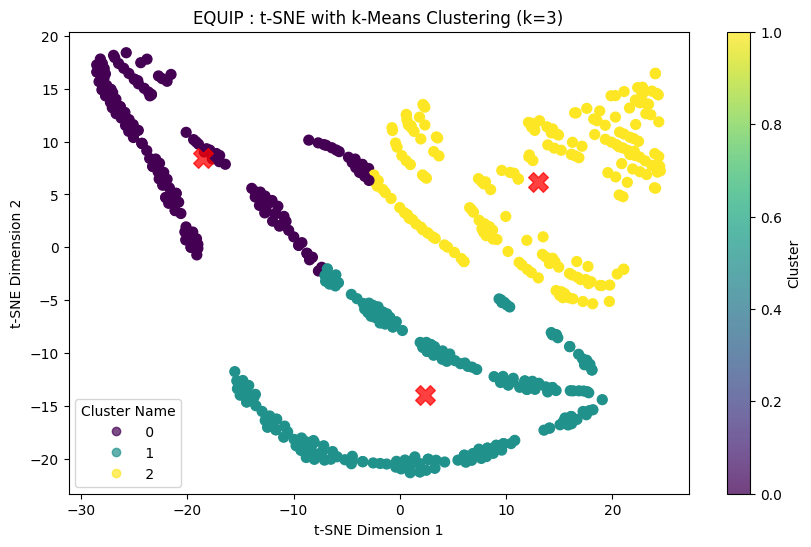

In [ ]:
# Define the optimal number of clusters (based on elbow method)
optimal_k = 3  # Replace with the value you identified from the elbow plot

# Apply k-Means clustering
kmeans1 = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
tsne_df1['Cluster'] = kmeans1.fit_predict(data_tsne1)

# Plot the results
plt.figure(figsize=(10, 6))
scatter1=plt.scatter(tsne_df1['Dim1'], tsne_df1['Dim2'], c=tsne_df1['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')

handles, labels = scatter1.legend_elements(prop="colors", alpha=0.7)
plt.legend(handles, [f' {i}' for i in range(len(labels))], title="Cluster Name")

plt.title(f'EQUIP : t-SNE with k-Means Clustering (k={optimal_k})')
#plt.xlim(-30,35)
#plt.ylim(-30,30)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
co=EQUIP.iloc[tsne_df1[tsne_df1['Cluster'] == 0].index]['CDR']
co.value_counts()

,count
CDR,
0.0,134
1.0,19


In [ ]:
c1=EQUIP.iloc[tsne_df1[tsne_df1['Cluster'] == 1].index]['CDR']
c1.value_counts()

,count
CDR,
0.0,167
1.0,43
2.0,3


In [ ]:
c2=EQUIP.iloc[tsne_df1[tsne_df1['Cluster'] == 2].index]['CDR']
c2.value_counts()

,count
CDR,
1.0,105
2.0,61
0.0,38


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-94-59b6df6e826b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input1['Cluster'] = clusters
<ipython-input-94-59b6df6e826b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input1['CDR'] = EQUIP['CDR']


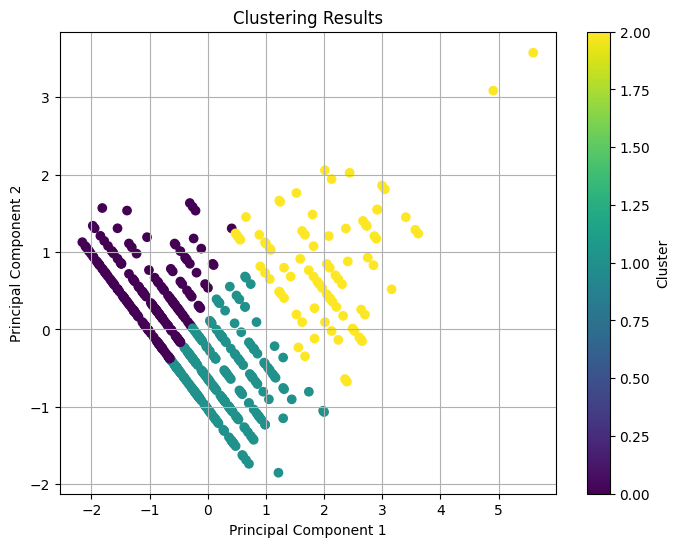

Silhouette Score: 0.4554665431833739


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(input1)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_pca)

# Add cluster labels to the original data
input1['Cluster'] = clusters
input1['CDR'] = EQUIP['CDR']
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluate clustering
silhouette_avg = silhouette_score(data_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')


In [ ]:
input1[input1['Cluster']==0]

,MMSE,nWBV,Cluster,CDR
1,29.0,0.810,0,0.0
9,30.0,0.827,0,0.0
16,28.0,0.813,0,0.0
18,29.0,0.785,0,0.0
19,23.0,0.765,0,1.0
...,...,...,...,...
787,29.0,0.756,0,0.0
797,30.0,0.746,0,0.0
806,30.0,0.801,0,0.0
807,30.0,0.796,0,0.0


In [ ]:
input1['CDR'].value_counts()

,count
CDR,
0.0,339
1.0,167
2.0,64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE